# Histograms

[13:48:08] INFO - Showing image ... (13.31 x 20.48)
[13:48:08] INFO - Showing image ... (13.31 x 20.48)


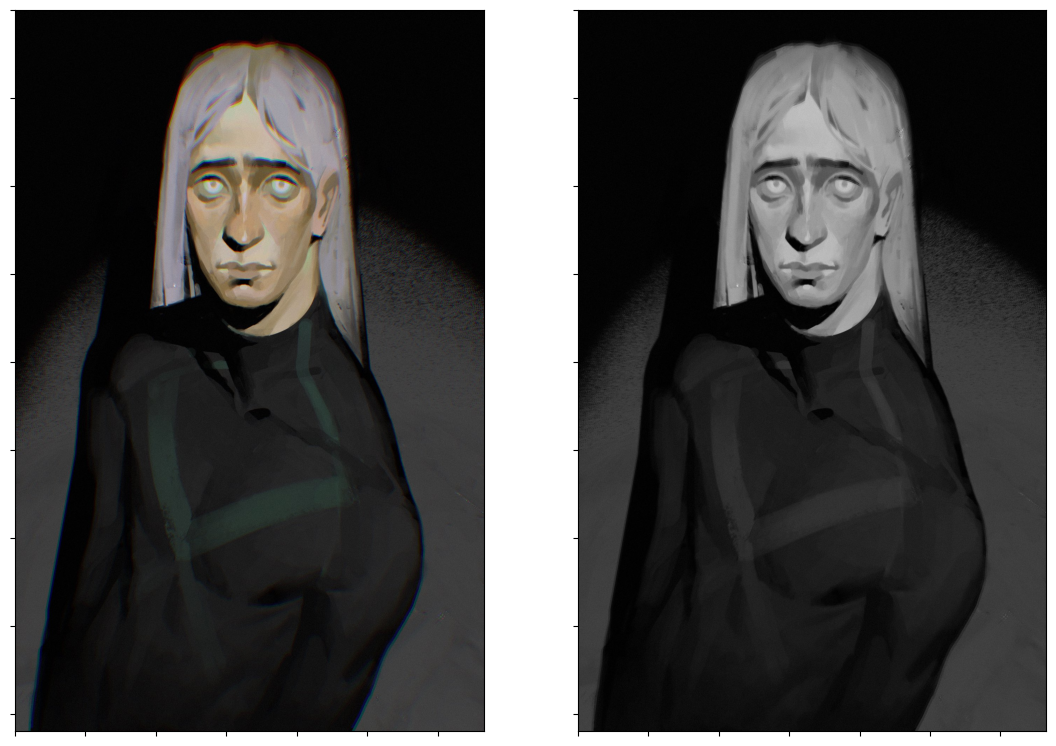

[13:48:09] INFO - Showing image ... (10.24 x 8.88)
[13:48:09] INFO - Showing image ... (10.24 x 8.88)


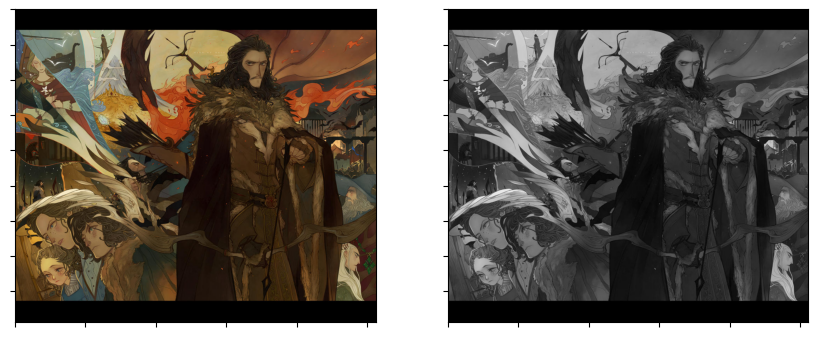

[13:48:10] INFO - Showing image ... (12.0 x 8.48)
[13:48:10] INFO - Showing image ... (12.0 x 8.48)


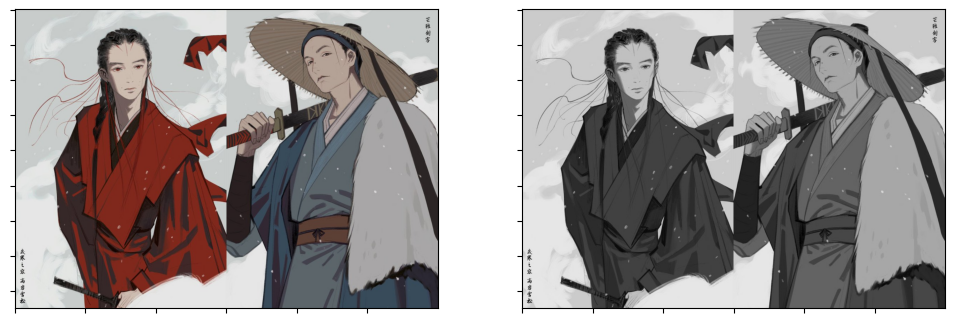

In [1]:
import os


import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import seaborn as sns

from custom_utils import *

import logging
logging.basicConfig(
    #  filename='log_file_name.log',
     level=logging.INFO, 
     format= '[%(asctime)s] %(levelname)s - %(message)s',
     datefmt='%H:%M:%S'
)

img_set = [
    (os.path.basename(fpath), load_image_and_show(fpath, scale=0.5))
    for fpath in ['../data/ptitsatart2.jpeg', '../data/wavesheep1.jpg', '../data/wavesheep2.jpeg']        
]

img_count = len(img_set)

## 1: Find, Plot, & Analyze

### Find Histogram

Using cv.calcHist

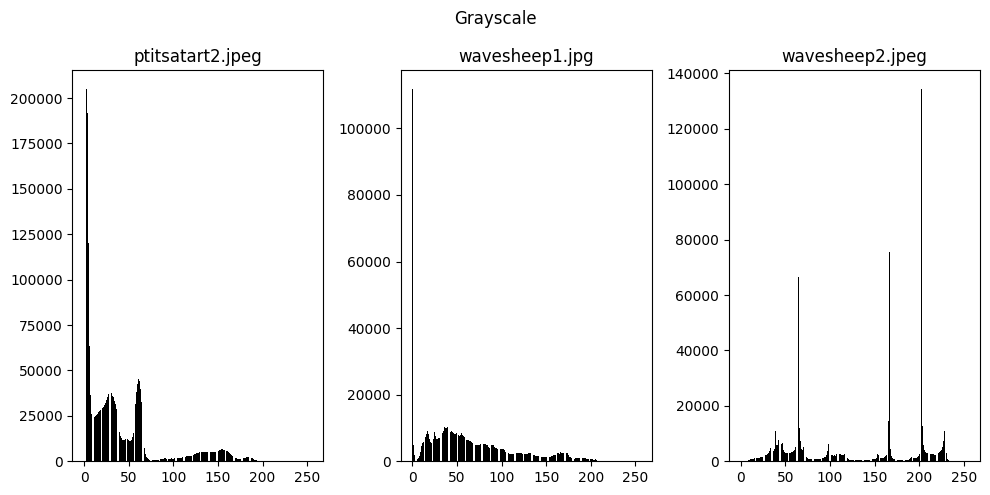

In [2]:
# using calcHist
fig, ax = plt.subplots(1, img_count, figsize=(10, 5))

for i, imset in enumerate(img_set):
    basename, content = imset
    h, w, img, img_rgb, img_gray = content 
    img_ = img_gray
    histo = cv.calcHist([img_], [0], None, [256], [0, 256])

    ax[i].bar(range(256), histo.reshape(-1), color='k')
    ax[i].set_title(basename)

fig.suptitle('Grayscale')
fig.tight_layout()

plt.show()

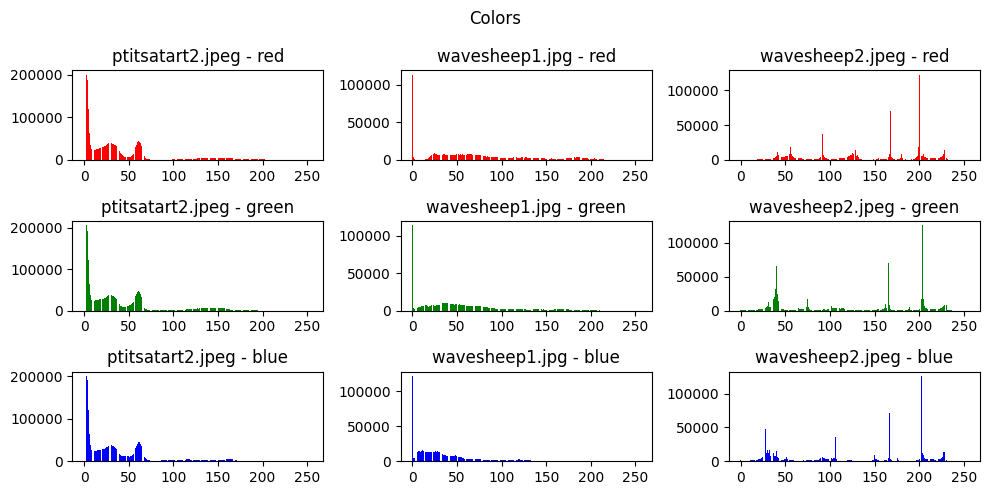

In [3]:
# using calcHist
fig, ax = plt.subplots(3, img_count, figsize=(10, 5))

clrs = ['red', 'green', 'blue']
for i, imset in enumerate(img_set):
    basename, content = imset
    h, w, img, img_rgb, img_gray = content 
    img_ = img_rgb
    for k in range(3):
        histo = cv.calcHist([img_], [k], None, [256], [0, 256])

        ax[k][i % img_count].bar(range(256), histo.reshape(-1), color=clrs[k])
        ax[k][i % img_count].set_title(f"{basename} - {clrs[k]}")

fig.suptitle('Colors')
fig.tight_layout()
histo[0]

plt.show()

Evaluate only masked area

[14:13:45] INFO - Showing image ... (13.31 x 20.48)
[14:13:45] INFO - Showing image ... (10.24 x 8.88)
[14:13:45] INFO - Showing image ... (12.0 x 8.48)


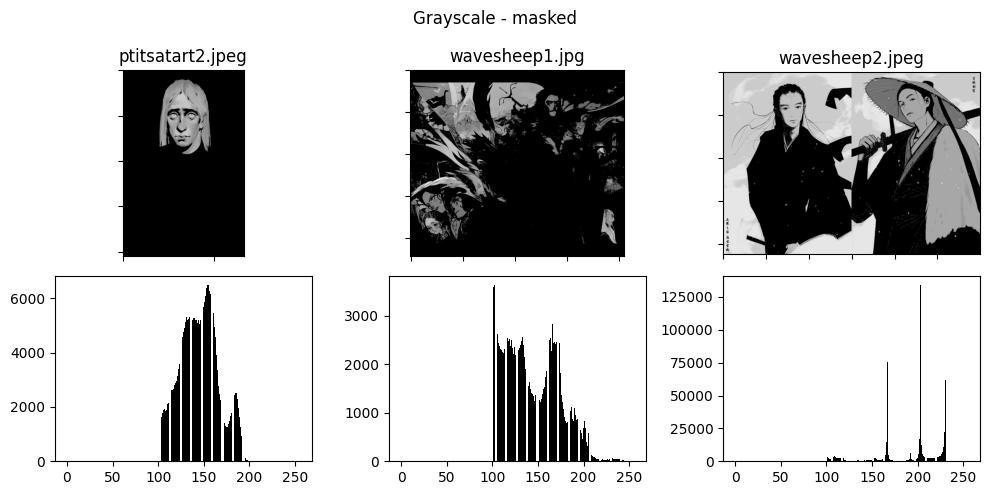

In [22]:
# using calcHist
fig, ax = plt.subplots(2, img_count, figsize=(10, 5))

for i, imset in enumerate(img_set):
    basename, content = imset
    h, w, img, img_rgb, img_gray = content 
    img_ = img_gray
    
    thresh_ = cv.threshold(img_, 100, 255, cv.THRESH_BINARY)[1]

    img_masked = cv.bitwise_and(img_, img_, mask=thresh_)

    histo = cv.calcHist([img_], [0], thresh_, [256], [0, 256])

    show_image(
        img_masked, ax=ax[0][i], title=f"{basename}", imshow_args={'cmap': 'gray'}
    )
    ax[1][i].bar(range(256), histo.reshape(-1), color='k')

fig.suptitle('Grayscale - masked')
fig.tight_layout()

plt.show()

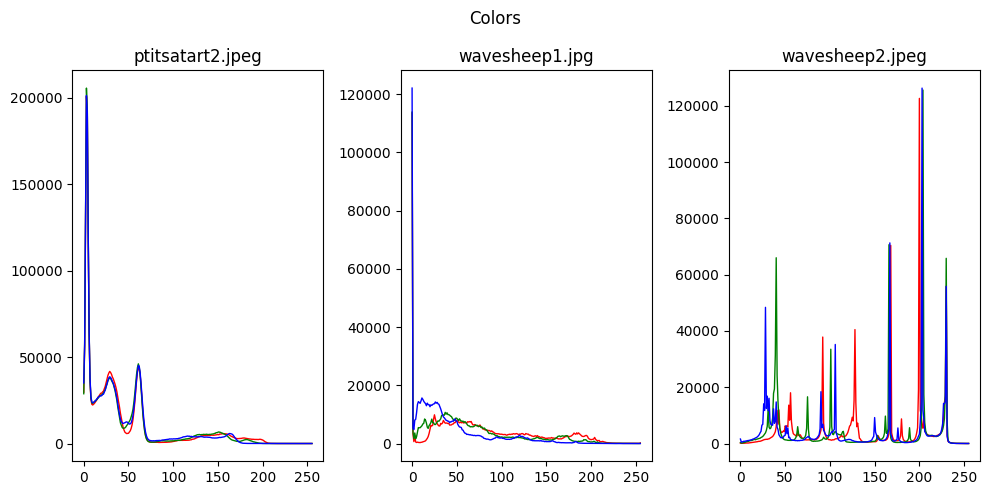

In [4]:
# using calcHist
fig, ax = plt.subplots(1, img_count, figsize=(10, 5))

clrs = ['red', 'green', 'blue']
for i, imset in enumerate(img_set):
    basename, content = imset
    h, w, img, img_rgb, img_gray = content 
    img_ = img_rgb
    for k in range(3):
        histo = cv.calcHist([img_], [k], None, [256], [0, 256])

        ax[i % img_count].plot(range(256), histo.reshape(-1), color=clrs[k], lw=1)
        ax[i % img_count].set_title(f"{basename}")

fig.suptitle('Colors')
fig.tight_layout()
histo[0]

plt.show()

Using numpy

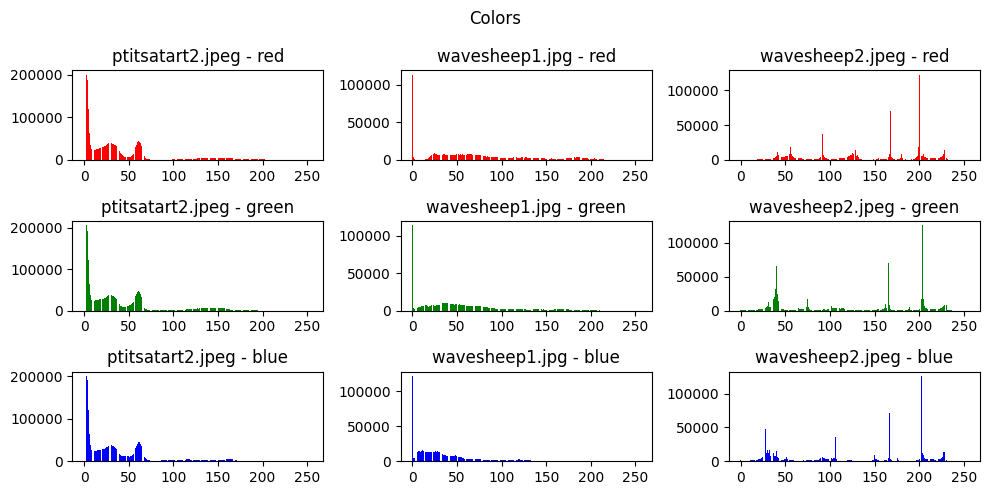

In [5]:
# using calcHist
fig, ax = plt.subplots(3, img_count, figsize=(10, 5))

clrs = ['red', 'green', 'blue']
for i, imset in enumerate(img_set):
    basename, content = imset
    h, w, img, img_rgb, img_gray = content 
    img_ = img_rgb
    for k in range(3):
        hist, bins = np.histogram(img_rgb[:, :, k].ravel(), 256, [0, 256])

        ax[k][i % img_count].bar(bins[:-1], hist, color=clrs[k])
        ax[k][i % img_count].set_title(f"{basename} - {clrs[k]}")

fig.suptitle('Colors')
fig.tight_layout()
histo[0]

plt.show()

## 2: Histogram Equalization

## 3: 2D Histograms

## 4: Histogram Backprojection